<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/Muyoung/decisionTree_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Data uploading and cleaning

In [2]:
#from google.colab import files
#uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dbcan = pd.read_csv("/content/drive/MyDrive/sds384_team_project/dbcan_result.3772genomes.matrix.divided_by_gene_counts.tsv", sep="\t")
print(dbcan.shape)
dbcan.head()

(3772, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cog = pd.read_csv("/content/drive/MyDrive/sds384_team_project/cog_ratios.csv")
print(cog.shape)
cog = cog[cog["Gene_Count___*_assembled"] > 0]
print(cog.shape)
cog.head()

(3837, 4216)
(3772, 4216)


,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,NPA,0.66,5886.0
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,0.24,5452.0
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,4.34,1359.0
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,NPA,0.20,6637.0
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,PA,1.93,6738.0


In [5]:
ko = pd.read_csv("/content/drive/MyDrive/sds384_team_project/ko_ratios.csv")
print(ko.shape)
ko = ko[ko["Gene_Count___*_assembled"] > 0]
print(ko.shape)
ko.head()

(3837, 8045)
(3772, 8045)


,Unnamed: 0,2016_taxon_oid,KO:K00001,KO:K00002,KO:K00003,KO:K00004,KO:K00005,KO:K00007,KO:K00008,KO:K00009,...,KO:K19775,KO:K19776,KO:K19777,KO:K19778,KO:K19784,KO:K19789,KO:K19792,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,108315.646925,0.0,108315.886397,108322.004191,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,0.66,5886.0
1,1,637000023,116932.035033,0.0,116932.230496,116931.768892,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,0.24,5452.0
2,2,637000028,469101.610743,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NPA,4.34,1359.0
3,3,637000046,96130.456381,0.0,96130.708905,96130.447190,0.0,96130.066898,96130.307217,0.0,...,0.0,0.0,0.0,0.0,96130.548591,0.0,0.0,NPA,0.20,6637.0
4,4,637000047,94709.523523,0.0,94709.241318,94709.456738,0.0,94709.182398,94709.415108,0.0,...,0.0,0.0,0.0,0.0,94709.528495,0.0,0.0,PA,1.93,6738.0


In [6]:
pfam = pd.read_csv("/content/drive/MyDrive/sds384_team_project/pfam_ratios.csv")
print(pfam.shape)
pfam = pfam[pfam["Gene_Count___*_assembled"] > 0]
print(pfam.shape)
pfam.head()

(3837, 8497)
(3772, 8497)


,Unnamed: 0,2016_taxon_oid,pfam00004,pfam00005,pfam00006,pfam00009,pfam00011,pfam00012,pfam00013,pfam00014,...,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,108315.827085,108316.206092,108316.067533,108315.763846,108315.709055,108315.920546,108315.964577,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,108315.442830,NPA,0.66,5886.0
1,1,637000023,116932.162937,116932.121066,116932.422276,116932.096234,116932.037142,116932.404255,116932.309519,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,116931.772744,NPA,0.24,5452.0
2,2,637000028,469101.753005,469180.954746,469102.080206,469101.530222,469101.460633,469101.303900,469101.396615,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,NPA,4.34,1359.0
3,3,637000046,96130.188501,96132.914638,96130.317312,96130.090017,96130.311737,96130.211993,96130.016724,0.0,...,0.0,0.0,0.0,96130.425908,96130.384812,0.0,0.000000,NPA,0.20,6637.0
4,4,637000047,94709.152228,94709.248084,94709.162857,94709.002721,94709.427011,94709.199110,94709.131048,0.0,...,0.0,0.0,0.0,94709.474622,94709.343425,0.0,0.000000,PA,1.93,6738.0


In [7]:
total = dbcan.merge(cog.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]
total = total.merge(ko.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]
total = total.merge(pfam.iloc[:, 1:-3], left_on="taxonID", right_on="2016_taxon_oid")
del total["2016_taxon_oid"]

del dbcan
del cog
del ko
del pfam

print(total.shape)
total.head()

(3772, 21095)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,pfam17194,pfam17195,pfam17196,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Separating soil bacteria

In [8]:
df = total[total["Classification"] != "soil"]
print(df.shape)
df.head()

(3261, 21095)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,pfam17194,pfam17195,pfam17196,pfam17197,pfam17198,pfam17199,pfam17200,pfam17201,pfam17202,pfam17203
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Traning and testing the decision tree model

In [9]:
features = df.columns[4:]
dependent_var = ["Classification"]

X = df[features]
y = df[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf1 = tree.DecisionTreeClassifier(max_depth=depth)
  clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred1))

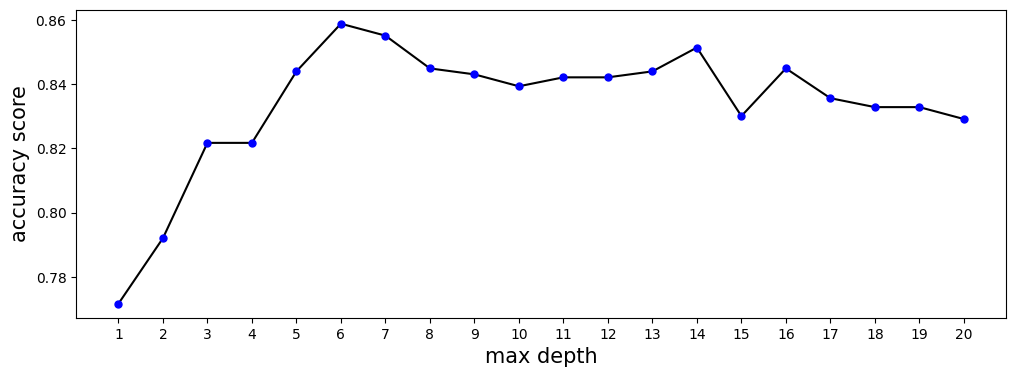

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [12]:
clf1 = tree.DecisionTreeClassifier(max_depth=10)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))

0.8486536675951718


In [13]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = clf1.feature_importances_
forest_importances = pd.Series(importances, index=clf1.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

COG0667      0.259363
KO:K08989    0.086919
KO:K07018    0.058100
COG3265      0.029794
COG0673      0.027234
COG3131      0.027068
PL1          0.021628
COG2121      0.019722
KO:K04568    0.017095
KO:K15268    0.016742
KO:K07778    0.015577
COG0843      0.015488
COG3087      0.014052
COG1523      0.012603
COG0300      0.011606
pfam00544    0.011413
COG1477      0.011364
pfam00150    0.011179
AA7          0.011039
KO:K00520    0.010671
dtype: float64

# Traning and testing the random forest model

In [15]:
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf2 = RandomForestClassifier(max_depth=depth)
  clf2.fit(X_train, y_train.values.ravel())
  y_pred2 = clf2.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred2))

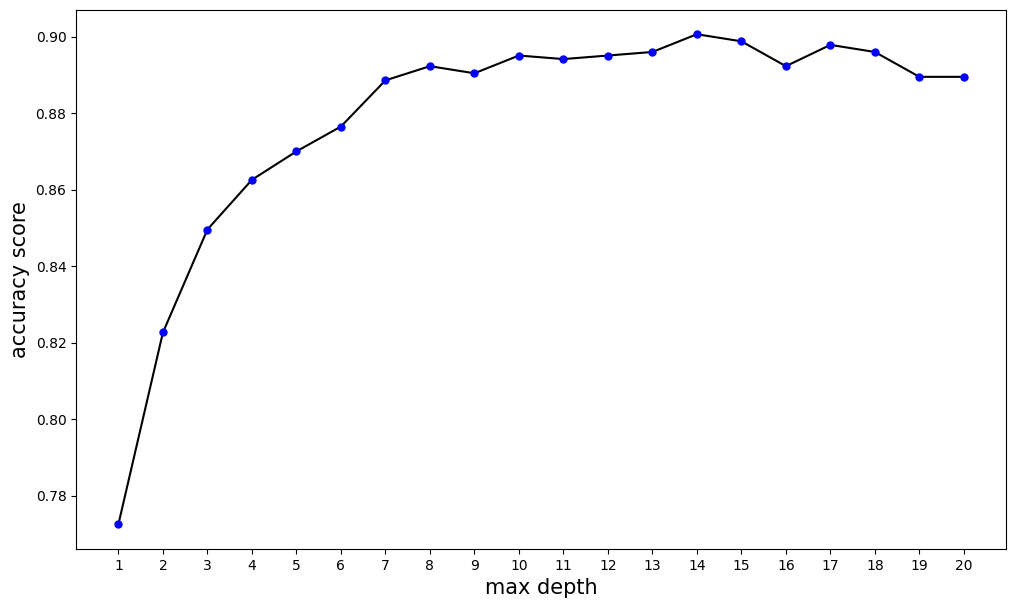

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
plt.xticks(depths)
plt.show()

In [19]:
clf2 = RandomForestClassifier(max_depth=14)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.8997214484679665


In [20]:
importances = clf2.feature_importances_
forest_importances = pd.Series(importances, index=clf2.feature_names_in_)
forest_importances.sort_values(ascending=False)[:20]

pfam01311    0.005789
COG1609      0.005105
COG4191      0.004966
COG0624      0.004469
COG4213      0.004388
KO:K03654    0.004135
pfam04339    0.004091
KO:K02396    0.004053
pfam01052    0.003658
pfam13677    0.003529
COG0569      0.003272
COG1172      0.003226
pfam02120    0.003200
COG0467      0.003115
COG1157      0.003112
pfam01028    0.003083
COG2085      0.003029
COG1879      0.002917
pfam03963    0.002915
COG1377      0.002879
dtype: float64

# Prediction on the soil bacteria using trained models

In [43]:
df = total[total["Classification"] == "soil"]
features = df.columns[4:]
dependent_var = ["Classification"]

X = df[features]
y = df[dependent_var]

df["prediction1"] = clf1.predict(X)
df["prediction2"] = clf2.predict(X)
df[["taxonID", "Order", "Classification", "prediction1", "prediction2"]].head(10)

<ipython-input-43-d9d18f199054>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction1"] = clf1.predict(X)
<ipython-input-43-d9d18f199054>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction2"] = clf2.predict(X)


,taxonID,Order,Classification,prediction1,prediction2
3261,2534682017,Acinetobacter,soil,NPA,NPA
3262,2534682020,Acinetobacter,soil,NPA,NPA
3263,2576861110,Acinetobacter,soil,NPA,NPA
3264,648028004,Acinetobacter,soil,NPA,NPA
3265,2502894011,Actinobacteria,soil,PA,NPA
3266,2504756050,Actinobacteria,soil,NPA,NPA
3267,2506783014,Actinobacteria,soil,NPA,NPA
3268,2506783048,Actinobacteria,soil,NPA,NPA
3269,2511231200,Actinobacteria,soil,NPA,NPA
3270,2513237387,Actinobacteria,soil,NPA,NPA


#Visualization of the tree

[Text(0.47654532967032964, 0.9545454545454546, 'COG0667 <= 0.001\ngini = 0.452\nsamples = 2184\nvalue = [1430, 754]\nclass = PA'),
 Text(0.27802197802197803, 0.8636363636363636, 'KO:K08989 <= 211114.211\ngini = 0.26\nsamples = 1318\nvalue = [1116, 202]\nclass = PA'),
 Text(0.17362637362637362, 0.7727272727272727, 'COG3131 <= 0.0\ngini = 0.142\nsamples = 1109\nvalue = [1024, 85]\nclass = PA'),
 Text(0.10989010989010989, 0.6818181818181818, 'KO:K07778 <= 388861.719\ngini = 0.082\nsamples = 1008\nvalue = [965, 43]\nclass = PA'),
 Text(0.07472527472527472, 0.5909090909090909, 'pfam13364 <= 258392.953\ngini = 0.048\nsamples = 966\nvalue = [942, 24]\nclass = PA'),
 Text(0.05714285714285714, 0.5, 'COG0104 <= 0.0\ngini = 0.039\nsamples = 960\nvalue = [941, 19]\nclass = PA'),
 Text(0.04835164835164835, 0.4090909090909091, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = NPA'),
 Text(0.06593406593406594, 0.4090909090909091, 'GH39 <= 0.001\ngini = 0.031\nsamples = 956\nvalue = [941, 15]\nclass =

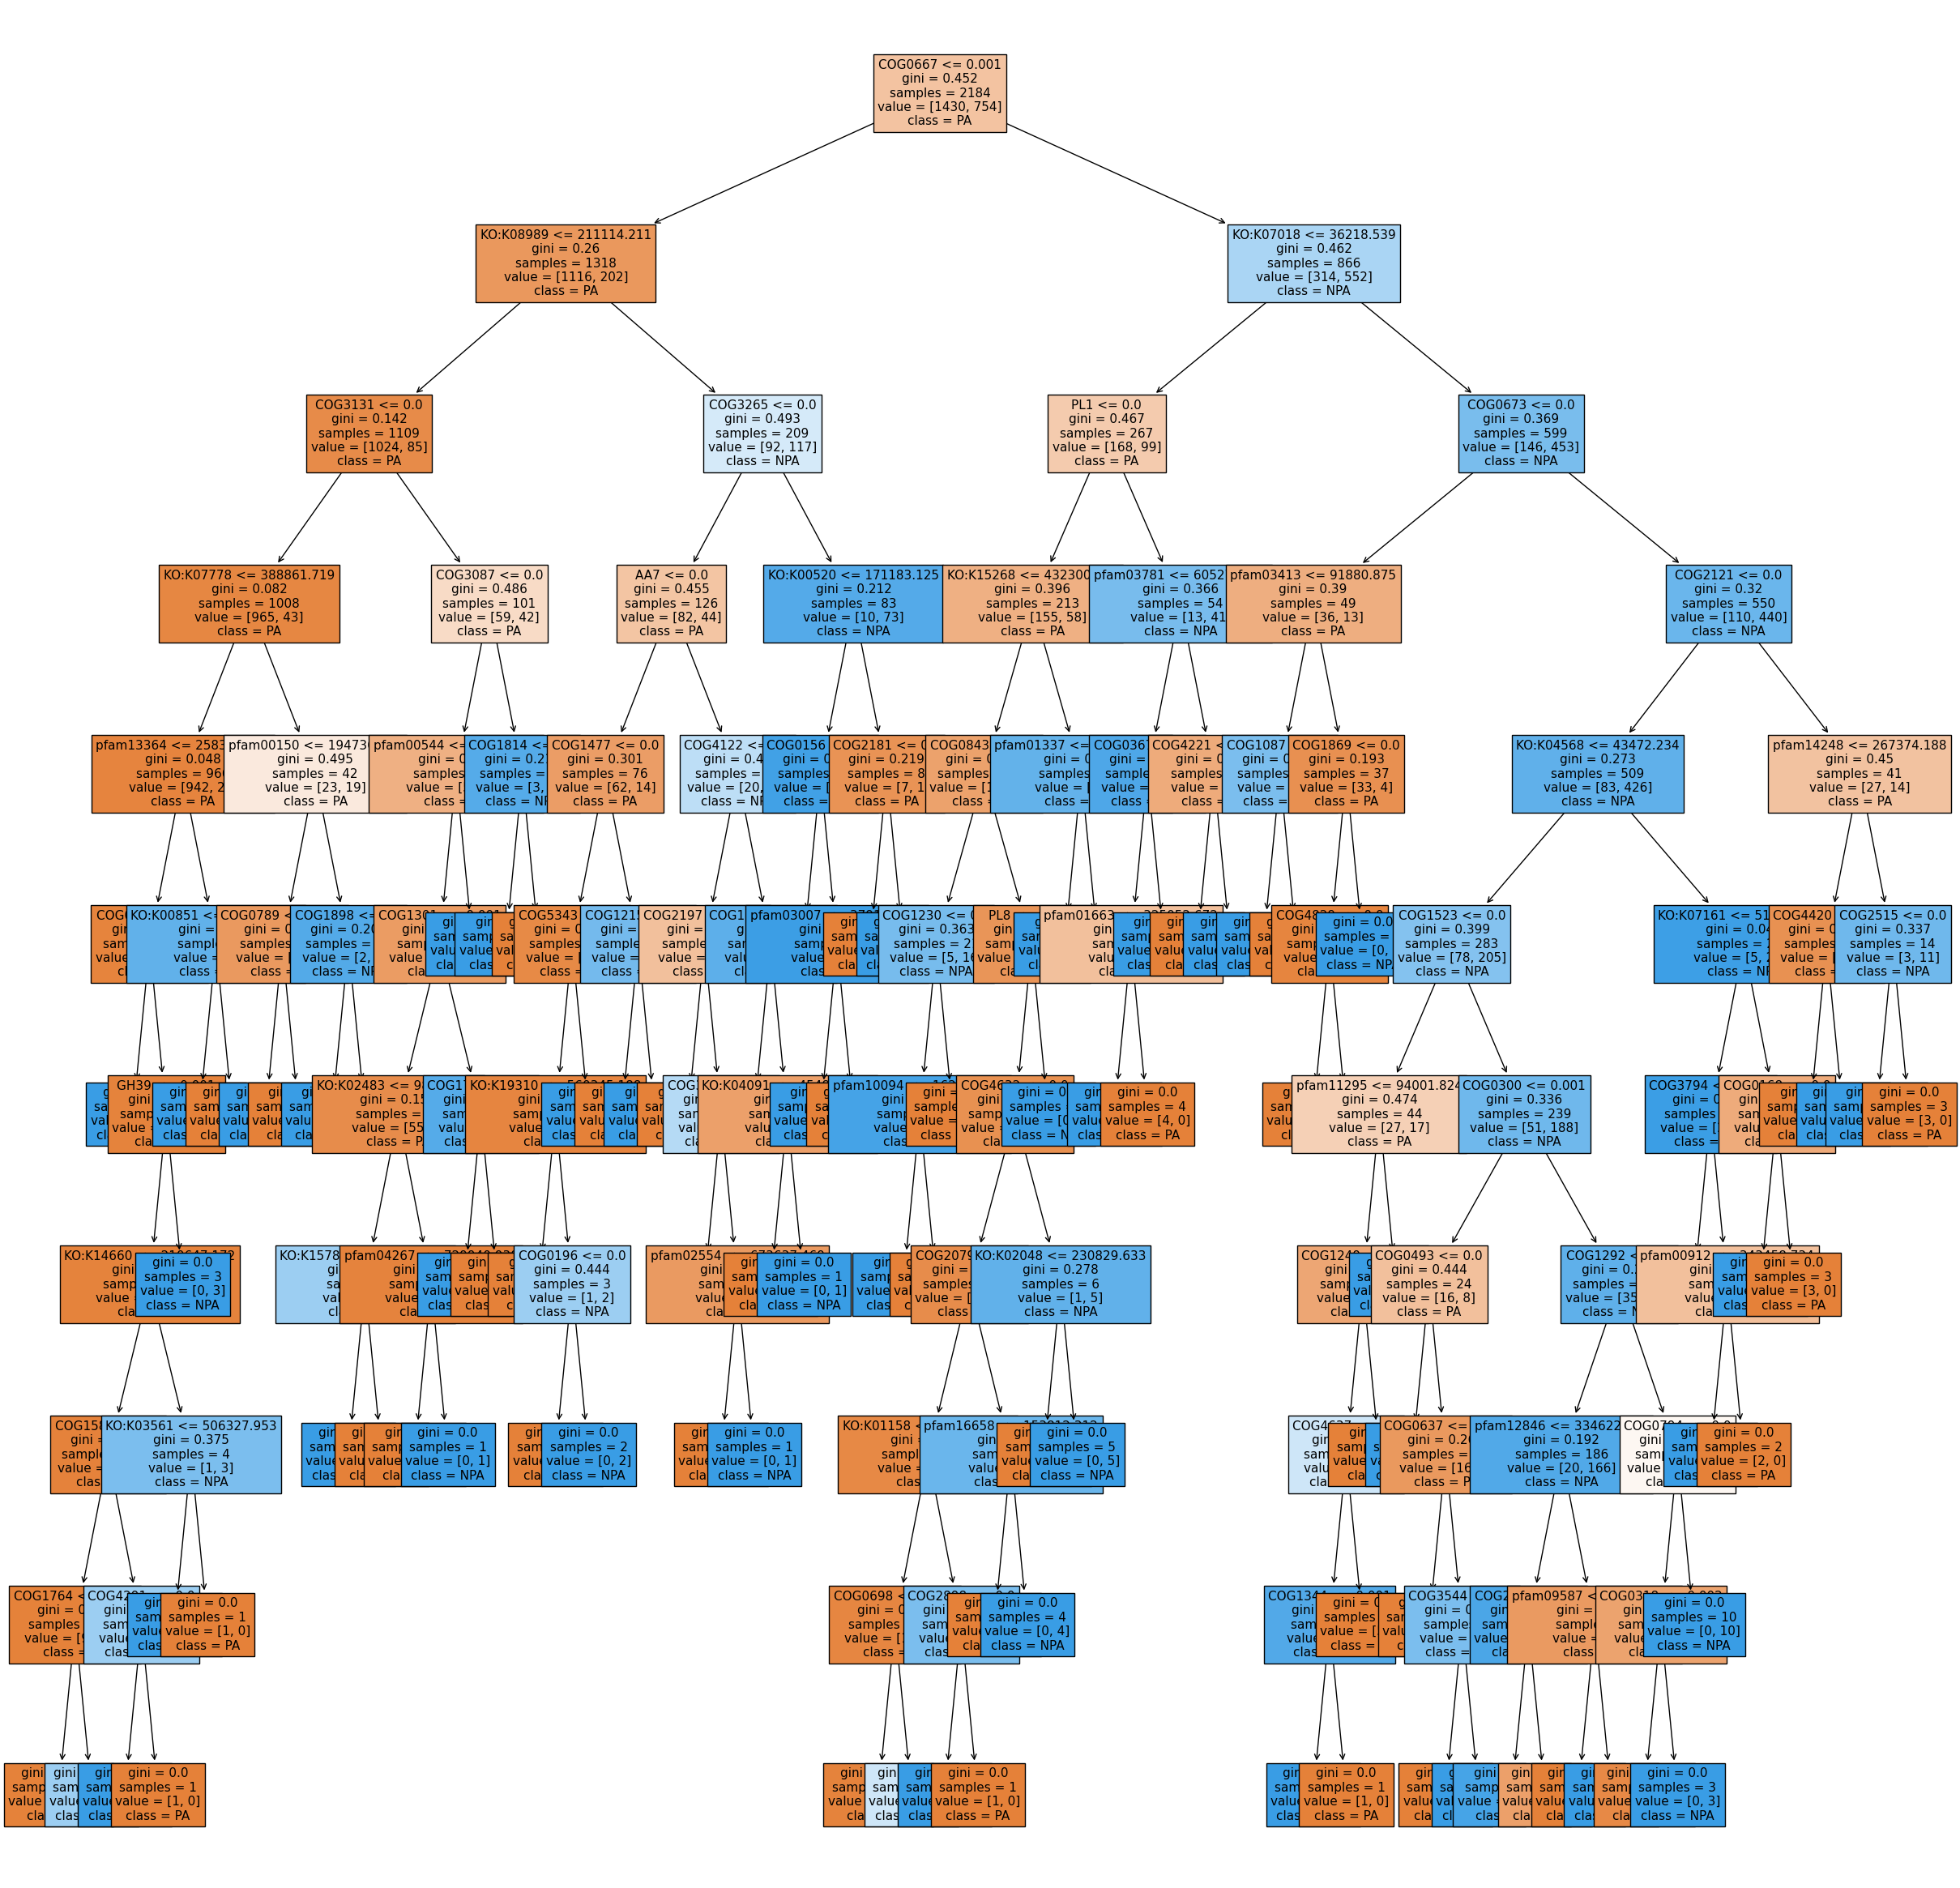

In [21]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf1, fontsize=11, feature_names=features, class_names=["PA", "NPA"], filled=True)